<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/ModuleB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT421 Module B Part 1

Isaac Nunez

Section 17.1: Interpolation Problem Statement

Interpolation is a method of estimating a function based off of a set of data points. It differs from regression in that the resulting function intersects each data point.

Regression is used when it can be assumed that the data contains errors while interpolation assumes that the data is free of errors.

In this example, the data points represented by x and y can be used to estimate a function f(x) = y that passes through each point using interpolation.

(0.0, 10.0)

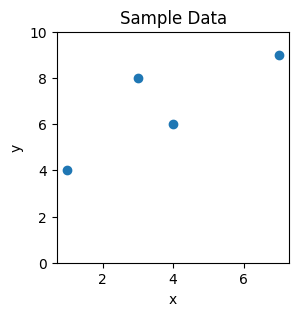

In [8]:
import matplotlib.pyplot as plt
x = [1, 3, 4, 7]
y = [4, 8, 6, 9]

plt.figure(figsize = (3,3))
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Data')
plt.ylim(0,10)
plt.show()

Section 17.2: Linear Interpolation

One form of interpolation is linear interpolation. It is done by creating lines between each point. This is done with the following formula:

f(x_n) = y_n + (y_(n+1) - y_n) / (x_(n+1) - x_n)

This forms a piecewise linear function that passes through every data point.

One notable weakness of linear interpolation is that it makes the assumption that all points between data points fall on a line, which makes this a fairly inaccurate form of interpolation. Another weakness is that the first derivative of the function is often not continuous.

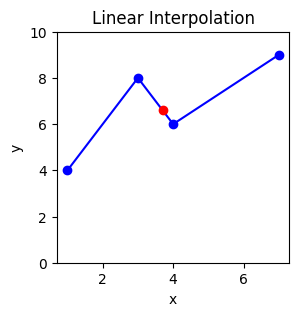

In [10]:
# This example uses the same data points as in section 17.1 and finds f(3.7) using linear interpolation
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = [1, 3, 4, 7]
y = [4, 8, 6, 9]

f = interp1d(x,y)
testvar = f(3.7)

plt.figure(figsize = (3,3))
plt.plot(x,y,'-ob')
plt.plot(3.7,testvar,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10)
plt.title('Linear Interpolation')
plt.show()

Section 17.3: Cubic Spline Interpolation

Cubic spline interpolation is another common method for interpolating a set of data. It is done by using cubic functions to approximate the value of the function.

A noteable benefit of this method is that the first and second derivatives are both continuous.

In order to perform cubic spline interpolation, n functions are required, where n is the number of data points minus 1. Each of these functions is in the form:

ax^3 + bx^2 + cx + d

Thus, 4 coefficients need to be solved for for each cubic function.

In order to find these coefficients, a system of equations can be created, where f_n(x) is a cubic function. Start by inputing all known values given by the data points.

f_1(x_1) = y_1,
f_1(x_2) = y_2,
f_2(x_2) = y_2,
.
.
.
f_n-1(x_n-1) = y_n-1,
f_n(x_n-1) = y_n-1,
f_n(x_n) = y_n,

Then, in order for the first derivative to be continuous, we must assume that the first derivatives of connecting functions must be equivalent at data points.

f'_1(x_2) = f'_2(x_2),
f'_2(x_3) = f'_3(x_3),
.
.
.
f'_n-1(x_n) = f'_n(x_n)

This is also repeated with the second derivative, resulting in 4n - 2 equations. The final 2 equations can be found by making an assumption about the endpoints. One way to do this is the natural cubic spline, which assumes that the second derivatives of the endpoints are zero.

f''_1(x_1) = 0,
f''_n(x_n) = 0,

This creates a system of 4n equations, which allows us to solve for all coefficients of the cubic functions.

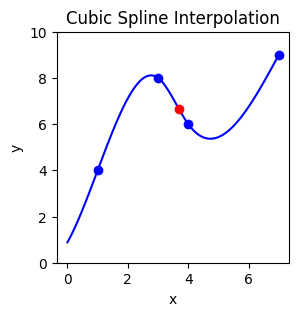

In [14]:
# This performs cubic spline interpolation on the same data set as the previous sections. It also predicts f(3.7)
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

x = [1, 3, 4, 7]
y = [4, 8, 6, 9]

f = CubicSpline(x,y, bc_type = 'natural')
xspline = np.linspace(0,7,100)
yspline = f(xspline)
testvar = f(3.7)

plt.figure(figsize = (3,3))
plt.plot(x,y,'bo')
plt.plot(xspline, yspline, 'b')
plt.plot(3.7,testvar,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10)
plt.title('Cubic Spline Interpolation')
plt.show()